In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/kaggle/input/houseprice/house_price.csv')

# Xem qua dữ liệu
print(data.head())

# Chuẩn bị dữ liệu
X = data['area'].values
y = data['price'].values
X = X.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Thêm một cột 1 vào X để tính toán bias
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

   area  price
0   147     49
1   150     50
2   153     51
3   158     54
4   163     58


In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_scaled)

print("Trọng số tối ưu:", theta_best)

Trọng số tối ưu: [[4.35973485e-16]
 [9.97239035e-01]]


In [6]:
predictions = X_b.dot(theta_best)
predictions = scaler_y.inverse_transform(predictions)

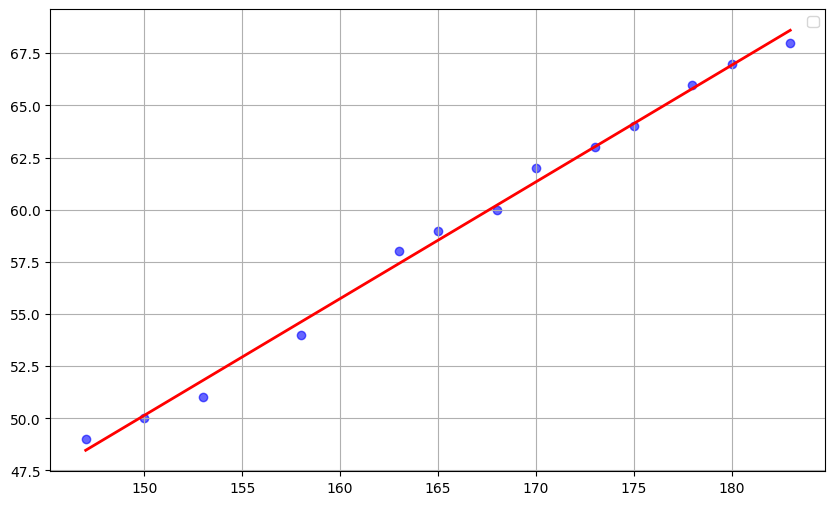

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, predictions, color='red', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()